<a href="https://colab.research.google.com/github/rodgersxy/AirBnB_clone/blob/master/phishing_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5


Demo Classifications:
Email: Urgent: Your account will be closed. Click here to prevent this!
Classification: Phishing

Email: Your monthly bank statement is ready for download.
Classification: Legitimate

Email: You've won a prize! Click here to claim it now!
Classification: Phishing

Email: Important notice: Update your account information immediately.
Classification: Phishing

Email: Thank you for your recent transaction. Here's your receipt.
Classification: Legitimate



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


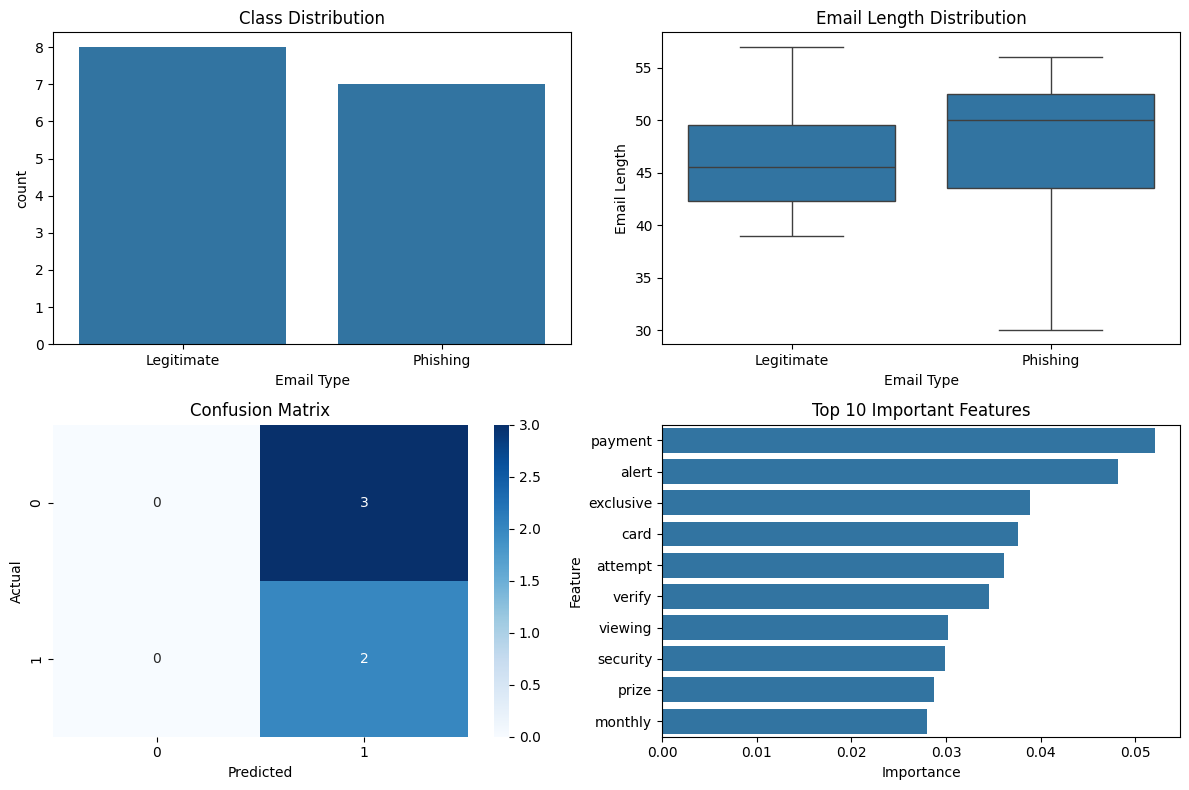

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Function to preprocess email content
def preprocess_email(email):
    email = email.lower()
    email = re.sub('<[^<]+?>', '', email)
    email = re.sub('[^a-zA-Z]', ' ', email)
    words = word_tokenize(email)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# dataset
data = {
    'email_content': [
        'Urgent: Update your bank account details now!',
        'Your monthly statement is ready for viewing',
        'Win a free iPhone! Click here!',
        'Payment received: KES 5000 credited to your account',
        'Security alert: Unusual activity detected on your account',
        "Congratulations! You've won a cash prize. Click to claim",
        'Your loan application has been approved',
        'Important: Verify your account to avoid suspension',
        'New features available in your mobile banking app',
        'Limited time offer: Increase your credit limit today!',
        'Reminder: Your credit card payment is due soon',
        'Exclusive investment opportunity. Act now!',
        'Your account has been temporarily locked. Verify now',
        'Welcome to our new secure banking portal',
        'Fraud alert: Unauthorized transaction attempt'
    ],
    'label': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]  # 1 for phishing, 0 for legitimate
}
df = pd.DataFrame(data)

# Preprocess the emails
df['processed_email'] = df['email_content'].apply(preprocess_email)

# Split the data
X = df['processed_email']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = clf.predict(X_test_vectorized)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Function to classify new emails
def classify_email(email_content):
    processed = preprocess_email(email_content)
    vectorized = vectorizer.transform([processed])
    prediction = clf.predict(vectorized)
    return "Phishing" if prediction[0] == 1 else "Legitimate"

# Demo
print("\nDemo Classifications:")
test_emails = [
    "Urgent: Your account will be closed. Click here to prevent this!",
    "Your monthly bank statement is ready for download.",
    "You've won a prize! Click here to claim it now!",
    "Important notice: Update your account information immediately.",
    "Thank you for your recent transaction. Here's your receipt."
]

for email in test_emails:
    print(f"Email: {email}")
    print(f"Classification: {classify_email(email)}\n")

# Visualizations
plt.figure(figsize=(12, 8))

# 1. Class distribution
plt.subplot(2, 2, 1)
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Email Type')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])

# 2. Email length distribution
df['email_length'] = df['email_content'].apply(len)
plt.subplot(2, 2, 2)
sns.boxplot(x='label', y='email_length', data=df)
plt.title('Email Length Distribution')
plt.xlabel('Email Type')
plt.ylabel('Email Length')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])

# 3. Confusion Matrix
plt.subplot(2, 2, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 4. Feature Importance
feature_importance = pd.DataFrame({
    'feature': vectorizer.get_feature_names_out(),
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.subplot(2, 2, 4)
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()